<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the DataSet**

In [ ]:
import pandas as pd
df_raw_train=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/train.csv")

In [ ]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/test.csv")

In [ ]:
df_raw_train.shape

(42748, 14)

In [ ]:
df_raw_test.shape

(18321, 14)

In [ ]:
df_raw_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [ ]:
df_raw_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,NaN,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,NaN,d,NaN
2,p,9.26,x,w,t,NaN,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [ ]:
df_raw_train.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

In [ ]:
''' checking null value percentage '''
(df[' Rocket'].isnull().sum() / len(df)) * 100

In [ ]:
df_raw_test.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

**Data Preprocessing**

1. Filled Nan Values with Mode values also tried with removing Nan Values.

2. Removing Outliers 

Filled Nan Value with Mode

In [ ]:
df_raw_train['gill-attachment'].fillna(df_raw_train['gill-attachment'].mode()[0], inplace=True)

In [ ]:
df_raw_train['gill-attachment'].isna().sum()

0

In [ ]:
df_raw_test['gill-attachment'].fillna(df_raw_test['gill-attachment'].mode()[0], inplace=True)

In [ ]:
df_raw_test['gill-attachment'].isna().sum()

0

In [ ]:
df_raw_train['ring-type'].fillna(df_raw_train['ring-type'].mode()[0], inplace =True)

In [ ]:
df_raw_train['ring-type'].isna().sum()

0

In [ ]:
df_raw_test['ring-type'].fillna(df_raw_test['ring-type'].mode()[0], inplace =True)

In [ ]:
df_raw_test['ring-type'].isna().sum()

0

In [ ]:
df_raw_train.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [ ]:
df_raw_test.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                  18321
dtype: int64

**Checking the outliers through Box Plot**

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

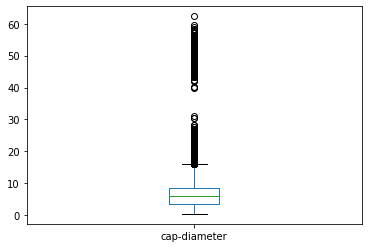

In [ ]:
plot_boxplot(df_raw_train, 'cap-diameter')

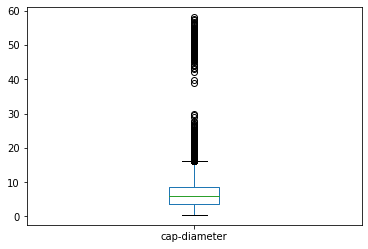

In [ ]:
plot_boxplot(df_raw_test, 'cap-diameter')

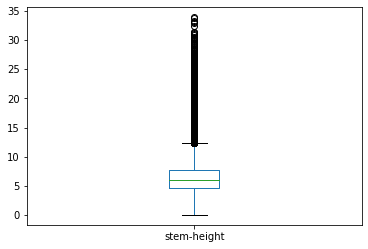

In [ ]:
  plot_boxplot(df_raw_train, 'stem-height')

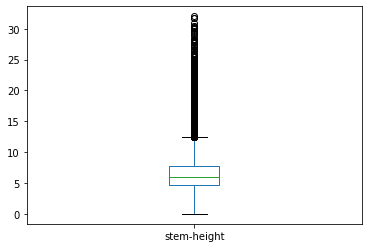

In [ ]:
  plot_boxplot(df_raw_test, 'stem-height')

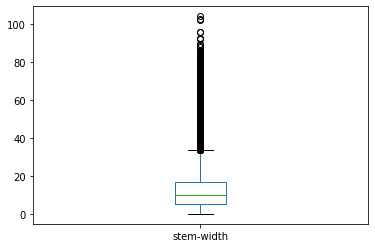

In [ ]:
plot_boxplot(df_raw_train, 'stem-width')

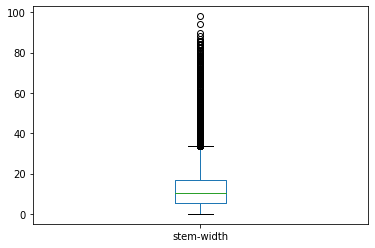

In [ ]:
plot_boxplot(df_raw_test, 'stem-width')

In [ ]:
df_raw_train.shape

(42748, 14)

In [ ]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_new_train.shape

(39011, 14)

In [ ]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw_test[cols].quantile(0.25)
Q3 = df_raw_test[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_test = df_raw_test[~((df_raw_test[cols] < (Q1 - 1.5 * IQR)) |(df_raw_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_new_test.shape

(16731, 14)

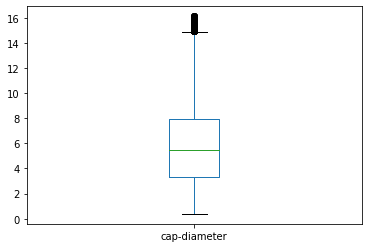

In [ ]:
  plot_boxplot(df_new_train, 'cap-diameter')

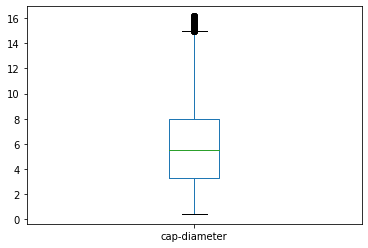

In [ ]:
  plot_boxplot(df_new_test, 'cap-diameter')

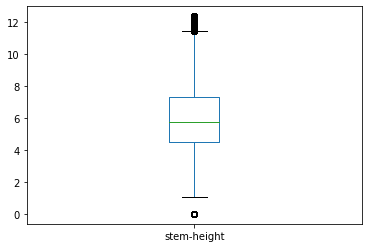

In [ ]:
  plot_boxplot(df_new_train, 'stem-height')

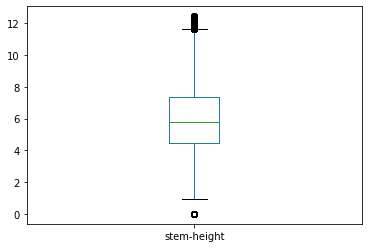

In [ ]:
  plot_boxplot(df_new_test, 'stem-height')

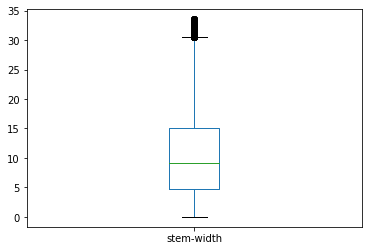

In [ ]:
  plot_boxplot(df_new_train, 'stem-width')

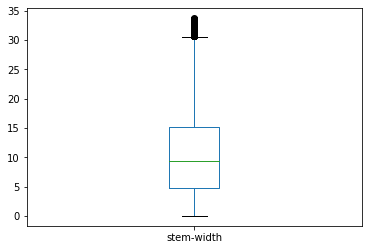

In [ ]:
  plot_boxplot(df_new_test, 'stem-width')

In [ ]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,f,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,f,d,NaN
2,p,9.26,x,w,t,a,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [ ]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,f,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,f,d,NaN
2,p,9.26,x,w,t,a,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
df_new_train['edible-poisonous'] = LE.fit_transform(df_new_train['edible-poisonous'])
df_new_train['cap-shape'] = LE.fit_transform(df_new_train['cap-shape'])
df_new_train['cap-color'] = LE.fit_transform(df_new_train['cap-color'])
df_new_train['does-bruise-or-bleed'] = LE.fit_transform(df_new_train['does-bruise-or-bleed'])
df_new_train['gill-attachment'] = LE.fit_transform(df_new_train['gill-attachment'])
df_new_train['gill-color'] = LE.fit_transform(df_new_train['gill-color'])
df_new_train['stem-color'] = LE.fit_transform(df_new_train['stem-color'])
df_new_train['has-ring'] = LE.fit_transform(df_new_train['has-ring'])
df_new_train['ring-type'] = LE.fit_transform(df_new_train['ring-type'])
df_new_train['habitat'] = LE.fit_transform(df_new_train['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_new_test['edible-poisonous'] = LE.fit_transform(df_new_test['edible-poisonous'])
df_new_test['cap-shape'] = LE.fit_transform(df_new_test['cap-shape'])
df_new_test['cap-color'] = LE.fit_transform(df_new_test['cap-color'])
df_new_test['does-bruise-or-bleed'] = LE.fit_transform(df_new_test['does-bruise-or-bleed'])
df_new_test['gill-attachment'] = LE.fit_transform(df_new_test['gill-attachment'])
df_new_test['gill-color'] = LE.fit_transform(df_new_test['gill-color'])
df_new_test['stem-color'] = LE.fit_transform(df_new_test['stem-color'])
df_new_test['has-ring'] = LE.fit_transform(df_new_test['has-ring'])
df_new_test['ring-type'] = LE.fit_transform(df_new_test['ring-type'])
df_new_test['habitat'] = LE.fit_transform(df_new_test['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_new_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,5.75,6,5,1,5,10,6.13,14.93,11,0,1,0,a
1,1,2.27,3,2,0,3,2,0.00,0.00,2,0,1,0,s
2,1,5.59,1,11,1,6,7,5.47,11.27,11,0,1,0,a
3,1,0.74,6,7,0,0,5,4.33,0.98,4,0,1,0,a
4,1,9.60,6,5,0,0,10,10.84,28.52,11,0,1,0,u


In [ ]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,4.68,6,10,0,6,10,8.22,9.58,6,1,1,1,NaN
1,1,10.33,6,11,0,0,11,11.98,13.29,12,1,1,0,NaN
2,1,9.26,6,10,1,0,10,7.41,12.68,11,1,3,1,NaN
3,1,14.90,5,10,1,1,10,5.33,23.03,11,0,1,0,NaN
4,1,1.01,6,10,0,0,10,3.17,1.64,1,0,1,3,NaN


**Splitting X and Y**

In [ ]:
x_train = df_new_train.iloc[:,0:13]

In [ ]:
y=pd.factorize(df_new_train['season'])

In [ ]:
x_test_data = df_new_test.iloc[:,0:13]

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_data)

**Splitting Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y, test_size=0.25, random_state=20, stratify=y)

**Train KNN Model with train data Data Set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_CLF = KNeighborsClassifier()
KNN_CLF.fit(x_train,y_train)
y_pred_knn = KNN_CLF.predict(x_test)

In [ ]:
y_pred_knn

array(['a', 'a', 'a', ..., 'a', 'a', 'u'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
KNN_acc = accuracy_score(y_test,y_pred_knn)
print(KNN_acc)
KNN_cm = confusion_matrix(y_test,y_pred_knn)
print(KNN_cm)
KNN_cr = classification_report(y_test,y_pred_knn)
print(KNN_cr)

0.51973751666154
[[2815  109 1696  249]
 [ 110  191   87   41]
 [1678  114 1795   83]
 [ 376   58   83  268]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.40      0.45      0.42       429
           u       0.49      0.49      0.49      3670
           w       0.42      0.34      0.38       785

    accuracy                           0.52      9753
   macro avg       0.47      0.46      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
acc_score_knn

0.51973751666154

**Applying Test Data on Trained KN N model**

In [ ]:
y_pred_knn_test = KNN_CLF.predict(x_scale_test)

In [ ]:
y_pred_knn_test

array(['a', 'u', 'u', ..., 'u', 'u', 'a'], dtype=object)

In [ ]:
type(y_pred_knn_test)

numpy.ndarray

In [ ]:
sub =pd.DataFrame(y_pred_knn_test)

**Export the Submission**

In [ ]:
sub.to_excel(r'/content/drive/MyDrive/Hackathon/submission/Final_sub.xlsx', index = False)

In [ ]:
test_accuracy =[]
k_values = range(1,16)

In [ ]:
for i in k_values:
    knn_clf =KNeighborsClassifier(n_neighbors=i, p=2)
    KNN_CLF.fit(x_train,y_train)
    y_pred_knn = KNN_CLF.predict(x_test)
    test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(2))

In [ ]:
print(test_accuracy)

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


No handles with labels found to put in legend.


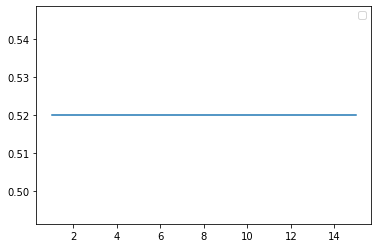

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,test_accuracy)
plt.legend()
plt.show()

**Model fitting of SVM with training data set**

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(kernel = "rbf", gamma = 'auto')
sv_clf.fit(x_train,y_train)
y_pred_sv = sv_clf.predict(x_test)

In [ ]:
SVM_acc = accuracy_score(y_test,y_pred_sv)
print(SVM_acc)
SVM_cm = confusion_matrix(y_test,y_pred_sv)
print(SVM_cm)
SVM_cr = classification_report(y_test,y_pred_sv)
print(SVM_cr)

0.5277350558802419
[[3410   24 1289  146]
 [ 146  103  134   46]
 [2064   37 1481   88]
 [ 497   23  112  153]]
              precision    recall  f1-score   support

           a       0.56      0.70      0.62      4869
           s       0.55      0.24      0.33       429
           u       0.49      0.40      0.44      3670
           w       0.35      0.19      0.25       785

    accuracy                           0.53      9753
   macro avg       0.49      0.38      0.41      9753
weighted avg       0.52      0.53      0.51      9753



In [ ]:
y_pred_sv_test = sv_clf.predict(x_scale_test)

In [ ]:
y_pred_sv_test

array(['u', 'a', 'a', ..., 'a', 'u', 'u'], dtype=object)

**Model fitting with Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log = log_reg.predict(x_test)

In [ ]:
y_pred_log

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

In [ ]:
LR_acc = accuracy_score(y_test,y_pred_log)
print(LR_acc)
LR_cm = confusion_matrix(y_test,y_pred_log)
print(LR_cm)
LR_cr = classification_report(y_test,y_pred_log)
print(LR_cr)

0.4994360709525274
[[4407    0  397   65]
 [ 355   18   56    0]
 [3238    0  419   13]
 [ 727    2   29   27]]
              precision    recall  f1-score   support

           a       0.50      0.91      0.65      4869
           s       0.90      0.04      0.08       429
           u       0.47      0.11      0.18      3670
           w       0.26      0.03      0.06       785

    accuracy                           0.50      9753
   macro avg       0.53      0.27      0.24      9753
weighted avg       0.49      0.50      0.40      9753



In [ ]:
y_pred_log_test = log_reg.predict(x_scale_test)

In [ ]:
y_pred_log_test

array(['u', 'a', 'u', ..., 'a', 'a', 'a'], dtype=object)

**Model fitting of training Data Set with Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", max_depth=None)
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

In [ ]:
y_pred_dt

array(['a', 'a', 'a', ..., 'u', 'a', 'u'], dtype=object)

In [ ]:
DT_acc = accuracy_score(y_test,y_pred_dt)
print(DT_acc)
DT_cm = confusion_matrix(y_test,y_pred_dt)
print(DT_cm)
DT_cr = classification_report(y_test,y_pred_dt)
print(DT_cr)

0.5100994565774634
[[2738   96 1702  333]
 [  94  174  105   56]
 [1697  112 1755  106]
 [ 317   52  108  308]]
              precision    recall  f1-score   support

           a       0.57      0.56      0.56      4869
           s       0.40      0.41      0.40       429
           u       0.48      0.48      0.48      3670
           w       0.38      0.39      0.39       785

    accuracy                           0.51      9753
   macro avg       0.46      0.46      0.46      9753
weighted avg       0.51      0.51      0.51      9753



In [ ]:
dt_score = []
md = range(1,57)
for i in md:
    dt = DecisionTreeClassifier(criterion = "entropy", max_depth=i)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_score.append(accuracy_score(y_test,dt_pred))
print(dt_score)

[0.4992310058443556, 0.49912847329026966, 0.5002563313852149, 0.5071260125089716, 0.5021019173587614, 0.5178919306879934, 0.5124577053214395, 0.515738747052189, 0.5130729006459551, 0.5177893981339076, 0.5148159540654158, 0.5168666051471342, 0.513175433200041, 0.5180969957961653, 0.5183020609043372, 0.5223008305136881, 0.5133804983082129, 0.5113298472264944, 0.5127653029836973, 0.5125602378755255, 0.5169691377012201, 0.513175433200041, 0.5100994565774634, 0.5167640725930482, 0.5176868655798216, 0.5151235517276735, 0.5155336819440173, 0.5161488772685328, 0.5159438121603609, 0.5153286168358454, 0.5143032912949862, 0.5133804983082129, 0.5119450425510099, 0.5140982261868143, 0.5147134215113298, 0.5133804983082129, 0.5148159540654158, 0.5130729006459551, 0.510509586793807, 0.5137906285245566, 0.5173792679175638, 0.5119450425510099, 0.5112273146724085, 0.5148159540654158, 0.5138931610786425, 0.5135855634163847, 0.5123551727673537, 0.5144058238490721, 0.5143032912949862, 0.5122526402132677, 0.

No handles with labels found to put in legend.


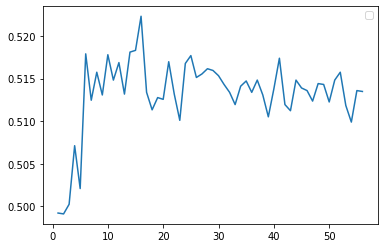

In [ ]:
import matplotlib.pyplot as plt
plt.plot(md,dt_score)
plt.legend()

In [ ]:
y_pred_dt_test = DT.predict(x_scale_test)

In [ ]:
y_pred_dt_test

array(['u', 'a', 'u', ..., 'u', 'a', 'a'], dtype=object)

In [ ]:
DT.tree_.node_count

18745

In [ ]:
DT.tree_.max_depth

50

**Model fitting with Ensemble Methods**

**Ada Bosst**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(base_estimator=DT, n_estimators=100)
ADB.fit(x_train,y_train)
y_pred_adab = ADB.predict(x_test)

In [ ]:
adab_acc = accuracy_score(y_test,y_pred_adab)
print(adab_acc)
adab_cm = confusion_matrix(y_test,y_pred_adab)
print(adab_cm)
adab_cr = classification_report(y_test,y_pred_adab)
print(adab_cr)

0.5206603096483133
[[2816   85 1689  279]
 [ 103  160  122   44]
 [1659   92 1831   88]
 [ 371   32  111  271]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.43      0.37      0.40       429
           u       0.49      0.50      0.49      3670
           w       0.40      0.35      0.37       785

    accuracy                           0.52      9753
   macro avg       0.47      0.45      0.46      9753
weighted avg       0.52      0.52      0.52      9753



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GRB = GradientBoostingClassifier(n_estimators=100)
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

In [ ]:
grb_acc = accuracy_score(y_test,y_pred_grb)
print(grb_acc)
grb_cm = confusion_matrix(y_test,y_pred_grb)
print(grb_cm)
grb_cr = classification_report(y_test,y_pred_grb)
print(grb_cr)

0.5166615400389624
[[3623   19 1089  138]
 [ 156  110  148   15]
 [2393   44 1192   41]
 [ 560    9  102  114]]
              precision    recall  f1-score   support

           a       0.54      0.74      0.62      4869
           s       0.60      0.26      0.36       429
           u       0.47      0.32      0.38      3670
           w       0.37      0.15      0.21       785

    accuracy                           0.52      9753
   macro avg       0.50      0.37      0.39      9753
weighted avg       0.50      0.52      0.49      9753



In [ ]:
import numpy as np
np.arange(0.01,0.2,0.01)
range(1,100)

range(1, 100)

In [ ]:
np.arange(0.01,0.2,0.01)


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [ ]:
y_test

19893    a
32235    a
13939    a
17470    a
22714    u
        ..
37601    a
39691    u
640      a
32256    u
38284    u
Name: season, Length: 9753, dtype: object

In [ ]:
y_pred_grb

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

**XG Boosting**

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_scale_test)

In [ ]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [ ]:
acc_score_xgb

0.518

**Model fitting With Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [ ]:
Bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [ ]:
y_pred_bag= Bag.predict(x_test)

In [ ]:
bag_acc = accuracy_score(y_test,y_pred_bag)
print(bag_acc)
bag_cm = confusion_matrix(y_test,y_pred_bag)
print(bag_cm)
bag_cr = classification_report(y_test,y_pred_bag)
print(bag_cr)

0.5200451143237979
[[2790   87 1692  300]
 [  89  188  105   47]
 [1653  121 1792  104]
 [ 344   44   95  302]]
              precision    recall  f1-score   support

           a       0.57      0.57      0.57      4869
           s       0.43      0.44      0.43       429
           u       0.49      0.49      0.49      3670
           w       0.40      0.38      0.39       785

    accuracy                           0.52      9753
   macro avg       0.47      0.47      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
acc_score_bagging=[]
settings = np.arange(0.1,1,0.1)

No need to code Random State incase of Bagging. Bagging Will take care of Sample by default.

In [ ]:
for i in settings:
    bag = BaggingClassifier(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    acc_score_bagging.append(accuracy_score(y_pred_bg,y_test))
print(acc_score_bagging)

[0.5112273146724085, 0.5162514098226186, 0.5175843330257357, 0.515738747052189, 0.5159438121603609, 0.5162514098226186, 0.5176868655798216, 0.5215831026350867, 0.515841279606275, 0.523838818824977, 0.5201476468778837, 0.5196349841074541, 0.517276735363478, 0.5169691377012201, 0.5192248538911104, 0.5205577770942275, 0.5168666051471342, 0.5135855634163847]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=0.6, n_estimators=100)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [ ]:
RF_acc = accuracy_score(y_test,y_RF_pred)
print(RF_acc)
RF_cm = confusion_matrix(y_test,y_RF_pred)
print(RF_cm)
RF_cr = classification_report(y_test,y_RF_pred)
print(RF_cr)

0.5190197887829385
[[2792   86 1692  299]
 [  96  190   92   51]
 [1658  112 1791  109]
 [ 346   45  105  289]]
              precision    recall  f1-score   support

           a       0.57      0.57      0.57      4869
           s       0.44      0.44      0.44       429
           u       0.49      0.49      0.49      3670
           w       0.39      0.37      0.38       785

    accuracy                           0.52      9753
   macro avg       0.47      0.47      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
RF_score = []
setting = np.arange(0.1,1,0.1)
for i in setting:
    RF = RandomForestClassifier(max_features=i, n_estimators=100)
    RF.fit(x_train,y_train)
    RF_pred = RF.predict(x_test)
    RF_score.append(accuracy_score(y_test,y_RF_pred))

print(RF_score)

[0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385]
